Portfolio Assignment 2 – Introduction to Cultural Data Science

In [ ]:
Part 1. 
Load the 'divorce_margarine' dataset from the 'dslabs' package. Investigate the correlation 
between margarine consumption and divorce rates in Maine. Would an increase in the 
preference for margarine lead to skyrocketing divorce rates?

In [3]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [4]:
library(dslabs)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
data('divorce_margarine')

In [6]:
head(divorce_margarine)

,divorce_rate_maine,margarine_consumption_per_capita,year
,<dbl>,<dbl>,<int>
1,5.0,8.2,2000
2,4.7,7.0,2001
3,4.6,6.5,2002
4,4.4,5.3,2003
5,4.3,5.2,2004
6,4.1,4.0,2005


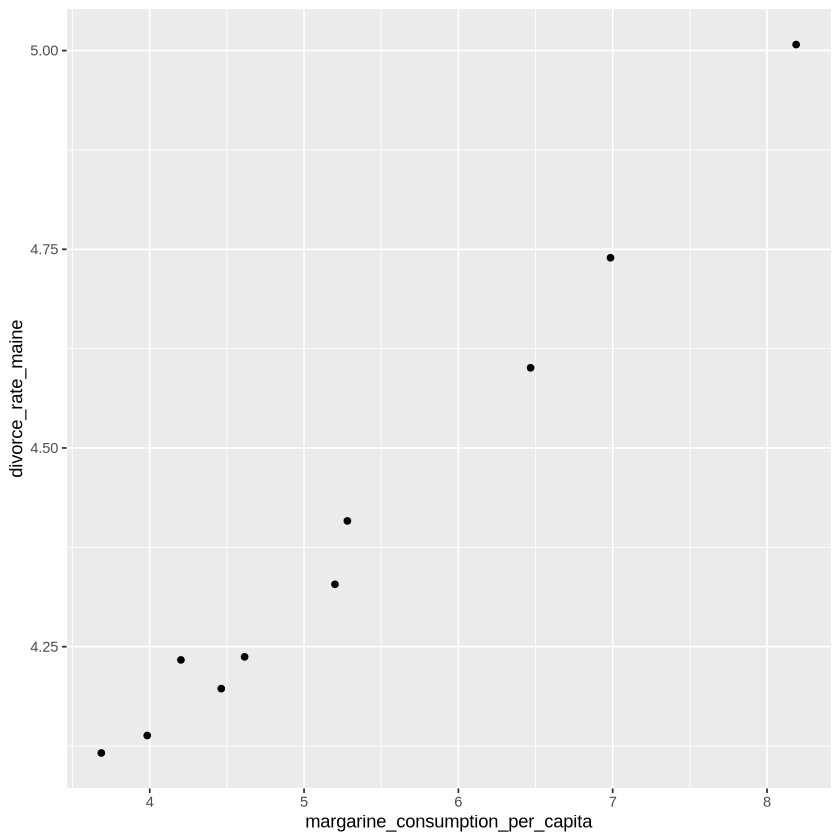

In [6]:
ggplot(divorce_margarine,
       aes(x=margarine_consumption_per_capita,
           y=divorce_rate_maine)) + 
    geom_point(position= 'jitter')

In [7]:
summary(lm(divorce_rate_maine ~ margarine_consumption_per_capita, data = divorce_margarine))


Call:
lm(formula = divorce_rate_maine ~ margarine_consumption_per_capita, 
    data = divorce_margarine)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05583 -0.01816 -0.01452  0.03601  0.04625 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.308626   0.048032   68.88 2.20e-12 ***
margarine_consumption_per_capita 0.201386   0.008735   23.05 1.33e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03841 on 8 degrees of freedom
Multiple R-squared:  0.9852,	Adjusted R-squared:  0.9833 
F-statistic: 531.5 on 1 and 8 DF,  p-value: 1.33e-08


Analyzing data: The very high F-statistic (531.5) and the low p-value (1.33e-08) shows a statistically significant relationship between divorce rates in Maine and margarine consumption (the two variables correlate). This means there is a very low probability of observing an F-statistic this high (531.5) if the null hypothesis (stating: no relationship between the variables) were true. In other words, the observed data provides strong evidence against the null hypothesis, indicating that margarine consumption is statistically significantly related to divorce rate.

Would an increase in the preference for margarine lead to skyrocketing divorce rates?
Despite the correlation between margarine consumption and divorce rates in Maine, the increase in the preference for margarine would NOT lead to an increase in divorce rates, exemplifying that “correlation does not imply causation” because the two variables are not causally related but are coincidentally correlated. 

In [8]:
Part 2: 
1. Is a person’s score on the vocabulary test (‘vocab’) significantly impacted by their level of 
education (‘educ’)? Visualize the relationship in a plot and build a model. Briefly explain the 
results. 

2. Whether a person is the native of an English-speaking country (‘nativeBorn’) could potentially 
have an impact on the size of their vocabulary. Visualize the relationship and add the predictor 
to the model. Briefly explain the results. 

3. Does a person’s level of education depend on whether they are a native of the country? 
Visualize the relationship. Do you think it makes sense to add the relationship as an interaction 
term? Try creating the model and briefly explain the results. 
Which model performs best? 


ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected numeric constant
1: Part 2.
         ^


In [7]:
load('GSSvocab.RData')

In [8]:
str(GSSvocab)

'data.frame':	28867 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


Filter for the year 1978 and remove rows with missing values (the function na.exclude() is one 
way to do this – check out the documentation!). 
Is a person’s score on the vocabulary test (‘vocab’) significantly impacted by their level of 
education (‘educ’)? Visualize the relationship in a plot and build a model. Briefly explain the 
results.

In [9]:
head(GSSvocab)

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12


In [10]:
data78 <- GSSvocab %>%
     filter(year == 1978) %>%
     na.exclude()
str(data78)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


`geom_smooth()` using formula = 'y ~ x'


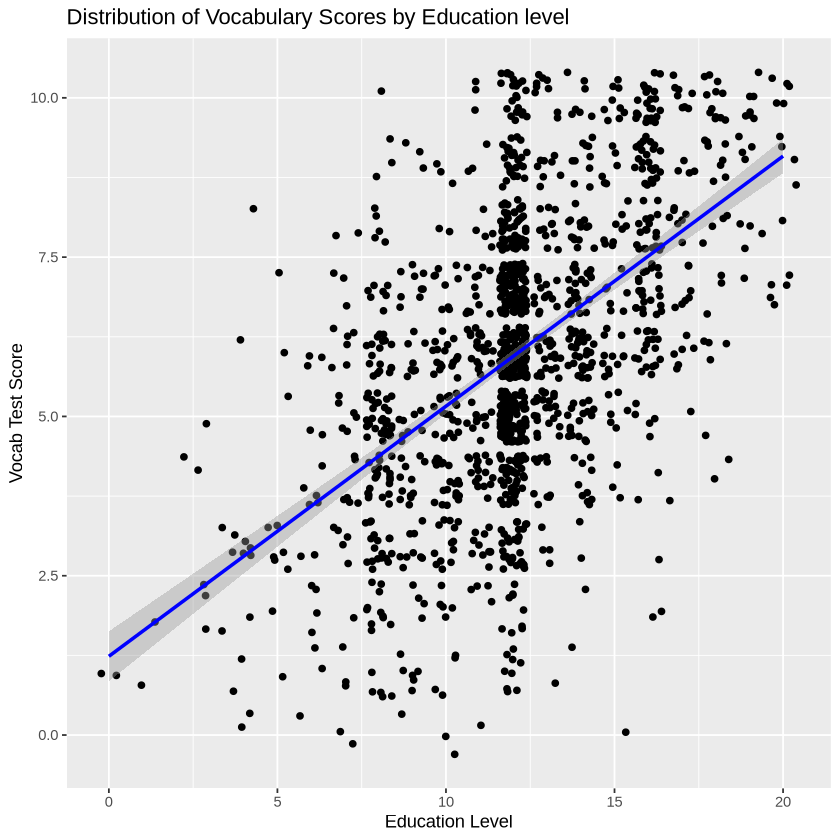

In [11]:
ggplot(data78,
       aes(x=educ,
           y=vocab)) +
       labs(title = "Distribution of Vocabulary Scores by Education level",
         x = "Education Level",
         y = "Vocab Test Score") +
    geom_point(position= 'jitter') +
    geom_smooth(method = "lm", color = "blue")

In [12]:
summary(lm(vocab ~ educ, data = data78))


Call:
lm(formula = vocab ~ educ, data = data78)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


1. Is a person’s score on the vocabulary test (‘vocab’) significantly impacted by their level of 
education (‘educ’)?
Short: The data suggests that a person's score on the vocabulary test is significantly impacted by their level of education.  

Briefly explain the results: 

Firstly, the coefficient for educ is 0.39, meaning that for each year of education, the vocabulary score is predicted to increase by about 0.39 points. This indicates a positive relationship between education level and vocabulary score.

Secondly, the p-values for both the intercept and educ are very low, suggesting that there is a close relation between education and vocabulary.

Thirdly, the Multiple R-squared value is 28.83%, indicating that the model is a moderate fit for the data, suggesting that while education (the independent variable/predictor) influences vocabulary scores (the dependent variable/outcome) other factors may also have an impact.

Fourthly, the F-statistic (597.5) and its extremely low p-value (< 2.2e-16) indicate a very low probability of having an F-statistic so extreme given the null hypothesis were true. In other words, the relationship between vocabulary scores and education level is statistically significant.


2. Whether a person is the native of an English-speaking country (‘nativeBorn’) could potentially have an impact on the size of their vocabulary. Visualize the relationship and add the predictor to the model. Briefly explain the results.

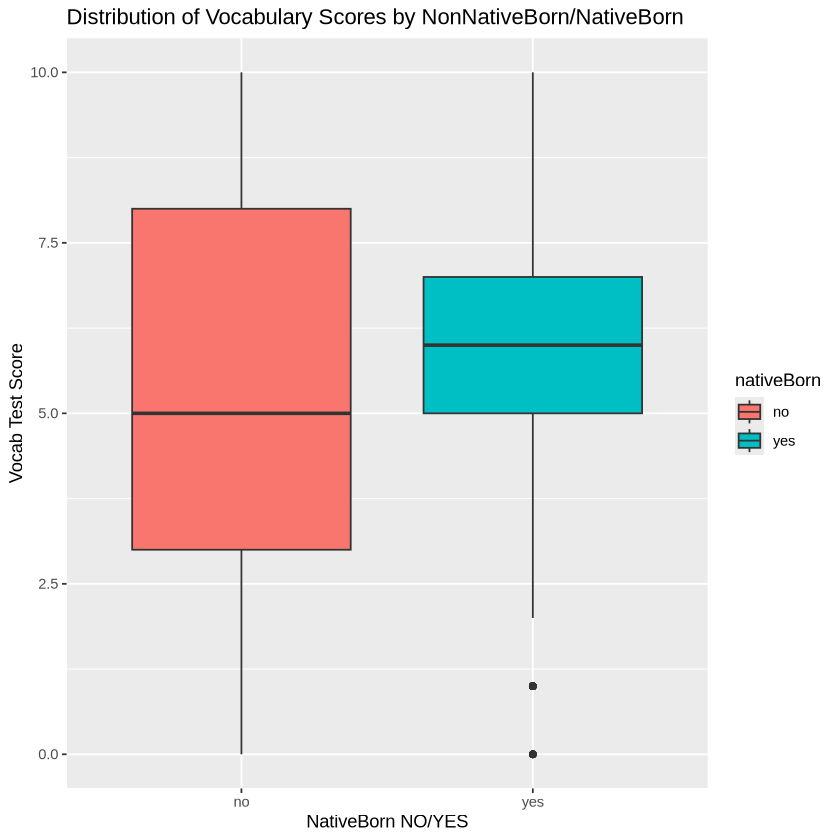

In [13]:
ggplot(data78,
       aes(x=nativeBorn,
           y=vocab,
          fill = nativeBorn)) +
       labs(title = "Distribution of Vocabulary Scores by NonNativeBorn/NativeBorn",
         x = "NativeBorn NO/YES",
         y = "Vocab Test Score") +
    geom_boxplot()

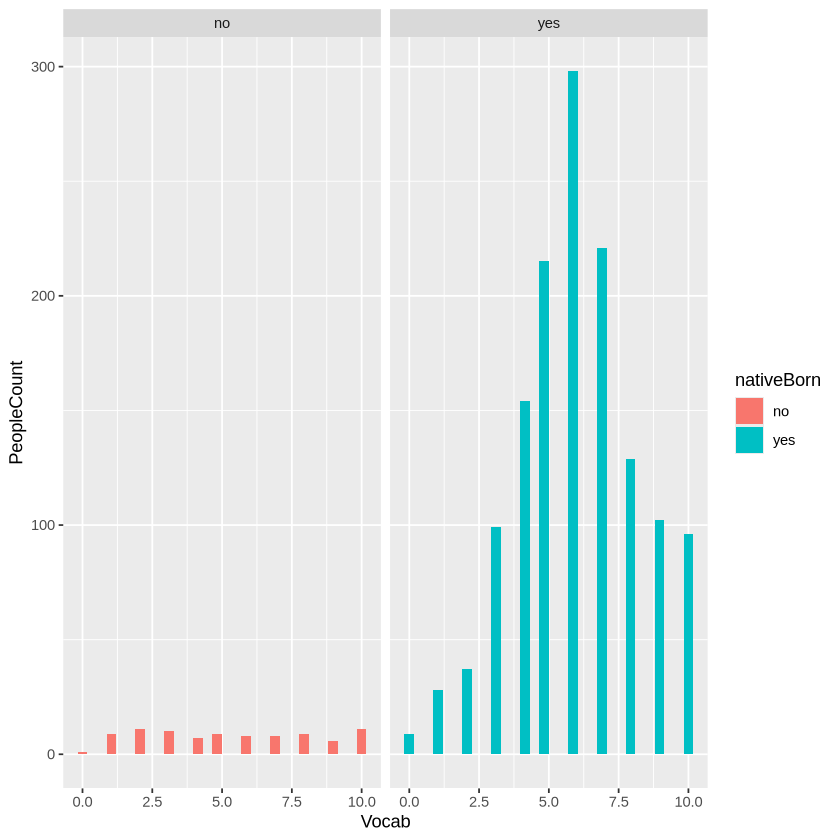

In [14]:
ggplot(data78, aes(x = vocab, fill = nativeBorn)) +
    geom_histogram(bins = 30) + 
    facet_wrap(~ nativeBorn) +  
    labs(x = "Vocab",
         y = "PeopleCount") 

Briefly explain the results: 

The data indicates that whether a person is the native of an English-speaking country have an impact on the size of their vocabulary. 
 
The boxplot shows the distribution of vocabulary scores for the two groups: "nativeBorn" and "non-nativeBorn". The median vocabulary score is lower for "non-nativeBorn" compared to "nativeBorn". Additionally, the "non-nativeBorn" group has a wider spread in vocab scores showing a greater variability between lower and higher vocab score.

The histogram displays the difference in numbers between the two groups, while also showing that "non-nativeBorn" vocab distribution is flat, whereas "nativeBorn" distribution is taller and more bell-shaped, constrate the scores around the center.


 3. Does a person’s level of education depend on whether they are a native of the country? 
Visualize the relationship. Do you think it makes sense to add the relationship as an interaction 
term? Try creating the model and briefly explain the results. Which model performs best? 

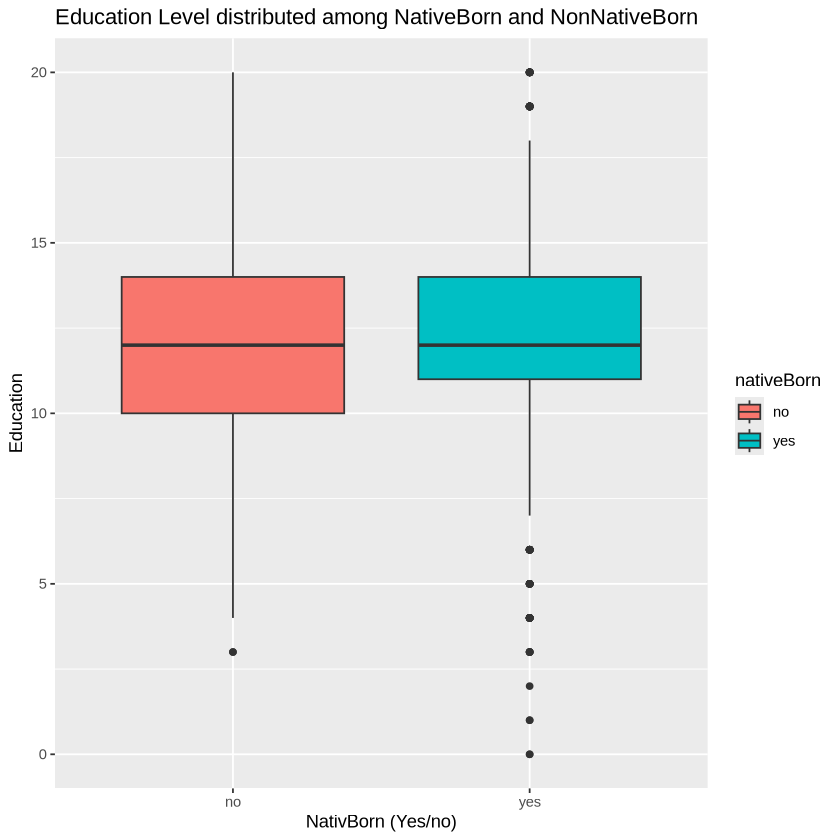

In [21]:
ggplot(data78, 
       aes(x = nativeBorn, 
           y = educ, 
           fill = nativeBorn)) +
    geom_boxplot() +
    labs(title = "Education Level distributed among NativeBorn and NonNativeBorn",
         x = "NativBorn (Yes/no)",
         y = "Education")

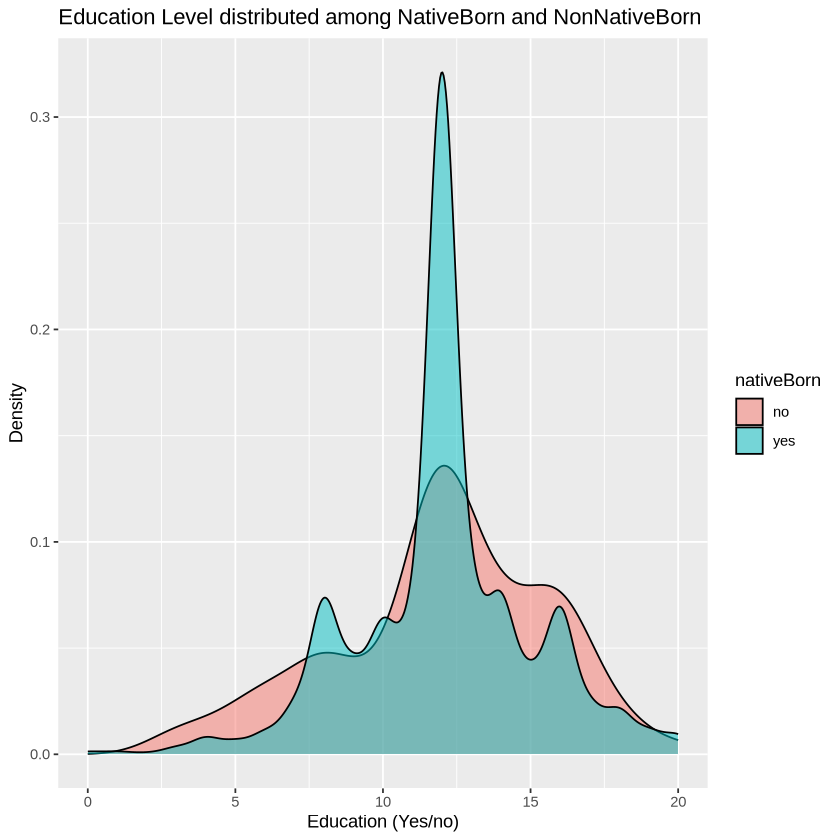

In [23]:
ggplot(data78,
       aes(x=educ,
           fill=nativeBorn)) +
       labs(title = "Education Level distributed among NativeBorn and NonNativeBorn",
         x = "Education (Yes/no)",
         y = "Density") + 
    geom_density(alpha=0.5)

Yes, a person’s level of education tends to depend on whether they are a native of the country. The boxplot above shows that the median educ is higher for "NativeBorn" compared to Non-"NativeBorn" individuals, indicating that "NativeBorn" individuals tend to have higher education levels. furthermore, the spread of educ is wider for Non-"NativeBorn" indicating greater variability in education levels within this group.

Secondly, lets look at what model would be best to explain the above mentioned relationship

m1 <- lm(educ ~ nativeBorn, data = data78): The relationship between "educ" and whether a person is "nativeBorn".
m2 <- lm(educ ~ nativeBorn + vocab, data = data78): With "nativeBorn" and "vocab" as predictors of "educ". 
m3 <- lm(educ ~ nativeBorn * vocab, data = data78): The effect "vocab" on "educ" varies on "nativeBorn" status. It like an expanded term, in other words tests if the relationship between "vocab" and "educ" changes depending on "nativeBorn" status.

In [16]:
m1 <- lm(educ ~ nativeBorn, data78)
m2 <- lm(educ ~ nativeBorn + vocab, data78)
m3 <- lm(educ ~ nativeBorn * vocab, data78)

anova(m1, m2, m3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1475,13781.323,NA,NA,NA,NA
2,1474,9793.452,1,3987.87118,600.713517,1.520369e-111
3,1473,9778.595,1,14.85693,2.237975,1.348714e-01


With a high Sum of Sq and F-statistic, the second model best explains the relationship between the predictor and outcome. The third model only adds a small difference, so the interaction does not improve the model significantly.